In [50]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from matplotlib.patches import Rectangle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import cross_validation
from matplotlib.pyplot import figure, plot, legend, xlabel, show
from scipy.io import loadmat
from toolbox_02450 import gausKernelDensity
from matplotlib.pyplot import (figure, imshow, bar, title, xticks, yticks, cm,
                               subplot, show)


In [55]:

data = pd.Series({})
data['raw'] = pd.read_csv("movie_metadata.csv")

data['reduced'] = data['raw'][data['raw']['country'] == 'USA']
data['reduced'] = data['reduced'].drop(['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
                                        'cast_total_facebook_likes', 'director_facebook_likes', 'movie_facebook_likes',
                                        'aspect_ratio', 'facenumber_in_poster'], axis=1)
data['reduced'] = data['reduced'].dropna()
data['numerical'] = data['reduced'].select_dtypes(exclude=['object'])

In [64]:
data['numerical'].head(21)

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
0,723.0,178.0,760505847.0,886204,3054.0,237000000.0,2009.0,7.9
1,302.0,169.0,309404152.0,471220,1238.0,300000000.0,2007.0,7.1
3,813.0,164.0,448130642.0,1144337,2701.0,250000000.0,2012.0,8.5
5,462.0,132.0,73058679.0,212204,738.0,263700000.0,2012.0,6.6
6,392.0,156.0,336530303.0,383056,1902.0,258000000.0,2007.0,6.2
7,324.0,100.0,200807262.0,294810,387.0,260000000.0,2010.0,7.8
8,635.0,141.0,458991599.0,462669,1117.0,250000000.0,2015.0,7.5
10,673.0,183.0,330249062.0,371639,3018.0,250000000.0,2016.0,6.9
11,434.0,169.0,200069408.0,240396,2367.0,209000000.0,2006.0,6.1
13,313.0,151.0,423032628.0,522040,1832.0,225000000.0,2006.0,7.3


In [65]:
data['standardized'].head(21)

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
index,,,,,,,,
0,4.466437,3.097612,9.629037,4.912320,6.601949,4.478215,0.608529,1.438163
1,1.097007,2.690413,3.445757,2.289804,2.188687,5.914335,0.405183,0.678178
3,5.186743,2.464191,5.347290,6.543607,5.744085,4.774557,0.913547,2.008153
5,2.377550,1.016372,0.206154,0.652937,0.973581,5.086856,0.913547,0.203187
6,1.817312,2.102236,3.817577,1.732646,3.802347,4.956922,0.405183,-0.176806
7,1.273081,-0.431448,1.957212,1.174971,0.120578,5.002513,0.710202,1.343165
8,3.762138,1.423571,5.496162,2.235766,1.894631,4.774557,1.218566,1.058171
10,4.066267,3.323834,3.731479,1.660496,6.514462,4.774557,1.320239,0.488182
11,2.153455,2.690413,1.947098,0.831098,4.932395,3.839939,0.303510,-0.271804


# Outlier detection
In this part of the project the goal is to try to detect outliers in the dataset. This will be done by applying Gaussian Kernel density with leave-one-out-cross-validation, K-Nearest Neighbor Density Estimation and K-Nearest Neighbor average relative density estimation.

Since the scale of the different attributies differs so much, the numerical part of the dataset is first normalized before doing the analysis.

In [56]:
data['standardized'] = StandardScaler().fit_transform(data['numerical'].values)
data['standardized'] = pd.DataFrame(data['standardized'], columns=data['numerical'].columns.values)
data['standardized']['index'] = data['numerical'].index
data['standardized'] = data['standardized'].set_index('index')
X = data['standardized'].values

## Gaussian Kernel density estimator
With 'gausKernelDensity' from 'toolbox_02450' and scripts from exersices with some changes, Gaussian Kernel density estimation is made.  

In [57]:
x = np.linspace(-10, 10, 50)

### Gausian Kernel density estimator
# cross-validate kernel width by leave-one-out-cross-validation
# (efficient implementation in gausKernelDensity function)
# evaluate for range of kernel widths
widths = X.var(axis=0).max() * (2.0**np.arange(-10,3))
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
   density, log_density = gausKernelDensity(X,w)
   logP[i] = log_density.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0:1f}'.format(width))

# evaluate density for estimated width
density, log_density = gausKernelDensity(X,width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Display the index of the lowest density data object
lowest_index = i[:10]
lowest_density = density[:10]

print('Lowest density for Gausian Kernel density estimator:\n')
for i, low_index in enumerate(lowest_index):
    low_density = lowest_density[i]
    print('Index: {:4}\t Density: {}'.format(low_index,low_density))

/home/krsvendsen/python/notebooks/toolbox_02450.py:569: RuntimeWarning: divide by zero encountered in log
  log_density = -np.log(N-1)-M/2*np.log(2*np.pi*width)+np.log(sQ)


Optimal estimated width is: 0.125000
Lowest density for Gausian Kernel density estimator:

Index:   56	 Density: [  4.13563443e-62]
Index:   20	 Density: [  6.25965172e-34]
Index: 1265	 Density: [  1.02984597e-31]
Index: 1532	 Density: [  4.65612439e-30]
Index:    0	 Density: [  2.77897628e-29]
Index:   85	 Density: [  3.16886142e-28]
Index:    2	 Density: [  1.43585920e-27]
Index:   23	 Density: [  7.21130944e-27]
Index: 2683	 Density: [  2.86359559e-25]
Index:  697	 Density: [  4.63103631e-24]


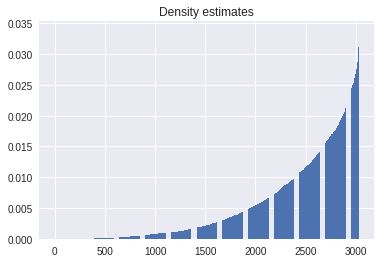

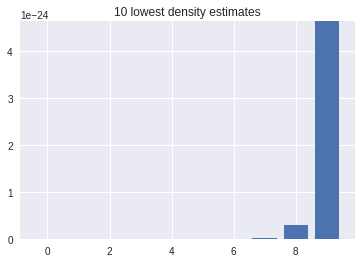

In [58]:
# Plot density estimate of outlier score
figure(1)
bar(range(len(X)),density[:len(X)])
title('Density estimates')
figure(2)
bar(range(10),density[:10])
title('10 lowest density estimates');

## K-neighbors density estimator

Lowest density for K-neighbours :

Index:   56	 Density: 0.193
Index: 1532	 Density: 0.249
Index:   20	 Density: 0.286
Index: 1265	 Density: 0.298
Index:    0	 Density: 0.300
Index:   23	 Density: 0.310
Index:   85	 Density: 0.316
Index:    2	 Density: 0.317
Index:  261	 Density: 0.323
Index: 2683	 Density: 0.334


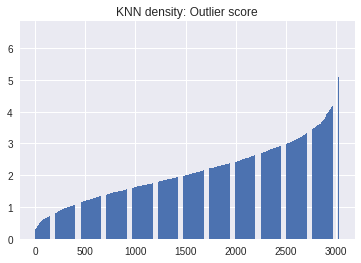

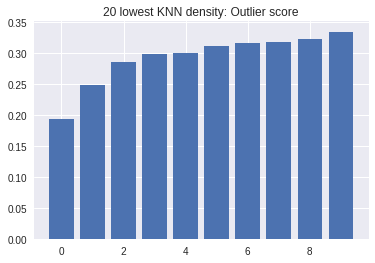

In [59]:
### K-neighbors density estimator
# Neighbor to use:
K = 5

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

density = 1./(D.sum(axis=1)/K)

# Sort the scores
i = density.argsort()
density = density[i]

# Plot k-neighbor estimate of outlier score (distances)
figure(3)
bar(range(len(X)),density[:len(X)])
title('KNN density: Outlier score')
figure(4)
bar(range(10),density[:10])
title('20 lowest KNN density: Outlier score')

# Display the index of the lowest density data object
lowest_index = i[:10]
lowest_density = density[:10]

print('Lowest density for K-neighbours :\n')
for i, low_index in enumerate(lowest_index):
    low_density = lowest_density[i]
    print('Index: {:4}\t Density: {:1.3f}'.format(low_index,low_density))
    

In [60]:
density.mean()

2.1144597317594984

## K-nearest neighbor average relative density

Lowest density for K-neighbours average relative density:

Index: 2695	 Density: 0.436
Index:  424	 Density: 0.472
Index: 2683	 Density: 0.510
Index:  672	 Density: 0.544
Index: 1748	 Density: 0.558
Index: 2890	 Density: 0.559
Index: 2117	 Density: 0.580
Index: 2311	 Density: 0.608
Index: 1257	 Density: 0.608
Index: 2510	 Density: 0.617


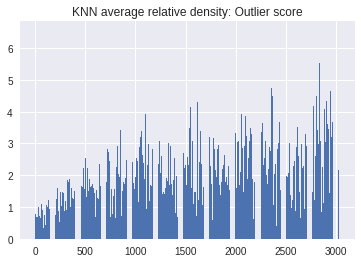

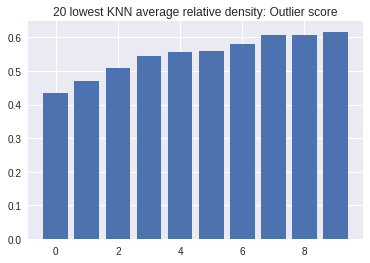

In [61]:
### K-nearest neighbor average relative density
# Compute the average relative density

knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)
density = 1./(D.sum(axis=1)/K)
avg_rel_density = density/(density[i[:,1:]].sum(axis=1)/K)

# Sort the avg.rel.densities
i_avg_rel = avg_rel_density.argsort()
avg_rel_density = avg_rel_density[i_avg_rel]

# Plot k-neighbor estimate of outlier score (distances)
figure(4)
bar(range(len(X)),density[:len(X)])
title('KNN average relative density: Outlier score')
figure(5)
bar(range(10),avg_rel_density[:10])
title('20 lowest KNN average relative density: Outlier score')

# Display the index of the lowest density data object
lowest_index = i_avg_rel[:10]
lowest_density = avg_rel_density[:10]

print('Lowest density for K-neighbours average relative density:\n')
for i, low_index in enumerate(lowest_index):
    low_density = lowest_density[i]
    print('Index: {:4}\t Density: {:1.3f}'.format(low_index,low_density))

In [62]:
avg_rel_density.mean()

1.1376042007257909


Lav samenligning mellem de forskellige estimators

Lowest density for Gausian Kernel density estimator:

Index:   56 1+2	 Density: [  4.13563443e-62]
Index:   20	1+2  Density: [  6.25965172e-34]
Index: 1265	1+2  Density: [  1.02984597e-31]
Index: 1532	1+2  Density: [  4.65612439e-30]
Index:    0	1+2  Density: [  2.77897628e-29]
Index:   85	1+2  Density: [  3.16886142e-28]
Index:    2	1+2  Density: [  1.43585920e-27]
Index:   23	1+2  Density: [  7.21130944e-27]
Index: 2683	1+2+3  Density: [  2.86359559e-25]
Index:  697	1    Density: [  4.63103631e-24]

Lowest density for K-neighbours :

Index:   56 1+2	 Density: 0.193
Index: 1532	1+2  Density: 0.249
Index:   20	1+2  Density: 0.286
Index: 1265	1+2  Density: 0.298
Index:    0	1+2  Density: 0.300
Index:   23	1+2  Density: 0.310
Index:   85	1+2  Density: 0.316
Index:    2	1+2  Density: 0.317
Index:  261	2    Density: 0.323
Index: 2683	1+2+3  Density: 0.334

Lowest density for K-neighbours average relative density:

Index: 2695	 Density: 0.436
Index:  424	 Density: 0.472
Index: 2683	1+2+3 Density: 0.510
Index:  672	 Density: 0.544
Index: 1748	 Density: 0.558
Index: 2890	 Density: 0.559
Index: 2117	 Density: 0.580
Index: 2311	 Density: 0.608
Index: 1257	 Density: 0.608
Index: 2510	 Density: 0.617

In [78]:
data['reduced'].iloc[[56, 20, 1265, 1532, 0, 85, 2, 23, 2683]]

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score
66,Color,Christopher Nolan,645.0,152.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,9.0
26,Color,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,7.7
1571,Color,Francis Ford Coppola,261.0,289.0,Marlon Brando,78800000.0,Drama|War,Harrison Ford,Apocalypse Now,450676,Robert Duvall,army|green beret|insanity|jungle|vietnam,http://www.imdb.com/title/tt0078788/?ref_=fn_t...,983.0,English,USA,R,31500000.0,1979.0,8.5
1937,Color,Frank Darabont,199.0,142.0,Jeffrey DeMunn,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,Bob Gunton,escape from prison|first person narration|pris...,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,4144.0,English,USA,R,25000000.0,1994.0,9.3
0,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9
97,Color,Christopher Nolan,642.0,148.0,Tom Hardy,292568851.0,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,Joseph Gordon-Levitt,ambiguous ending|corporate espionage|dream|sub...,http://www.imdb.com/title/tt1375666/?ref_=fn_t...,2803.0,English,USA,PG-13,160000000.0,2010.0,8.8
3,Color,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5
29,Color,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,7.0
3970,Color,Victor Fleming,157.0,226.0,George Reeves,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,Thomas Mitchell,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,8.2


In [77]:
print(data['reduced'].iloc[[56, 20, 1265, 1532, 0, 85, 2, 23, 2683]].drop(['color','plot_keywords', 'movie_imdb_link', 'language', 'country'], axis=1).to_latex())

\begin{tabular}{llrrlrlllrlrlrrr}
\toprule
{} &         director\_name &  num\_critic\_for\_reviews &  duration &      actor\_2\_name &        gross &                            genres &         actor\_1\_name &                movie\_title &  num\_voted\_users &          actor\_3\_name &  num\_user\_for\_reviews & content\_rating &       budget &  title\_year &  imdb\_score \\
\midrule
66   &     Christopher Nolan &                   645.0 &     152.0 &      Heath Ledger &  533316061.0 &       Action|Crime|Drama|Thriller &       Christian Bale &           The Dark Knight  &          1676169 &        Morgan Freeman &                4667.0 &          PG-13 &  185000000.0 &      2008.0 &         9.0 \\
26   &         James Cameron &                   315.0 &     194.0 &      Kate Winslet &  658672302.0 &                     Drama|Romance &    Leonardo DiCaprio &                   Titanic  &           793059 &         Gloria Stuart &                2528.0 &          PG-13 &  200000000.0 & 

It's seen that Gausian Kernel density estimator and K-neighbors density estimator have 9/10 of the same lowest density scores, where K-nearest neighbor average relative density only have 1 of those as the lowest. It could from this seems like there is good likelihood that following: blablablabla is outliers in the dataset.

In [66]:
data['standardized'].loc[[56, 20, 1265, 1532, 0, 85, 2, 23, 2683]]

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
index,,,,,,,,
56,2.585639,-0.748159,2.457176,1.040655,0.220216,3.292846,0.913547,0.773176
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,0.216633,1.378327,-0.333581,0.097056,0.691677,-0.172079,0.100164,0.108189
0,4.466437,3.097612,9.629037,4.912320,6.601949,4.478215,0.608529,1.438163
85,0.424721,0.835394,-0.270323,0.051252,-0.032526,3.064890,1.015220,-0.081807
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2.753710,3.459567,2.746028,2.367661,1.491216,4.204668,1.015220,1.438163
2683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
